In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/ML dataset/MNIST_data.csv')

In [ ]:
df.head()

label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0  
1         0         0         0         0  
2         0         0         0         0  
3         0         0         0         0  
4         0         0         0         0  

[5 rows x 785 columns]

In [ ]:
df.shape

(42000, 785)

In [ ]:
df.sample()

label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
10499      9       0       0       0       0       0       0       0       0   

       pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  \
10499       0  ...         0         0         0         0         0   

       pixel779  pixel780  pixel781  pixel782  pixel783  
10499         0         0         0         0         0  

[1 rows x 785 columns]

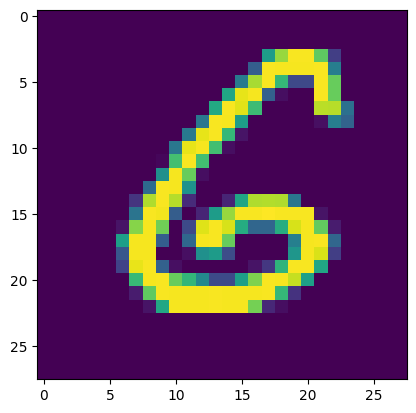

In [ ]:
plt.imshow(df.iloc[34268,1:].values.reshape(28,28))

In [ ]:
X = df.iloc[:,1:]
y = df.iloc[:,0]

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
X_train.shape

(33600, 784)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier()

In [ ]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [ ]:
import time
start = time.time()
y_pred = knn.predict(X_test)
print(time.time() - start)

30.10014772415161


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9648809523809524

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=100)

In [ ]:
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [ ]:
X_train_trf.shape


(33600, 100)

In [ ]:
knn = KNeighborsClassifier()

In [ ]:
knn.fit(X_train_trf,y_train)

KNeighborsClassifier()

In [ ]:
y_pred = knn.predict(X_test_trf)

In [ ]:
accuracy_score(y_test,y_pred)

0.9536904761904762

In [ ]:
for i in range(1,785):
    pca = PCA(n_components=i)
    X_train_trf = pca.fit_transform(X_train)
    X_test_trf = pca.transform(X_test)

    knn = KNeighborsClassifier()

    knn.fit(X_train_trf,y_train)

    y_pred = knn.predict(X_test_trf)

    print(accuracy_score(y_test,y_pred))

0.25702380952380954
0.3244047619047619
0.5104761904761905
0.6664285714285715
0.7377380952380952
0.8223809523809524
0.8428571428571429
0.8717857142857143


KeyboardInterrupt: ignored

In [ ]:
# transforming to a 2D coordinate system
pca = PCA(n_components=2)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [ ]:
X_train_trf

array([[-2.71864055, -0.49022133],
       [-0.67702561, -6.7534964 ],
       [-3.03320474,  6.51033592],
       ...,
       [ 2.14886537,  0.78171613],
       [ 1.05955331,  0.94682139],
       [17.70249005,  1.95984644]])

In [ ]:
import plotly.express as px
y_train_trf = y_train.astype(str)
fig = px.scatter(x=X_train_trf[:,0],
                 y=X_train_trf[:,1],
                 color=y_train_trf,
                 color_discrete_sequence=px.colors.qualitative.G10
                )
fig.show()

In [ ]:
# transforming in 3D
pca = PCA(n_components=3)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [ ]:
X_train_trf

array([[-2.7186495 , -0.48970258,  1.13579857],
       [-0.67701343, -6.75340153, -2.33565004],
       [-3.03320949,  6.50964658,  7.491402  ],
       ...,
       [ 2.14887507,  0.78079465, -0.74758087],
       [ 1.05957549,  0.94757475,  3.94974158],
       [17.70258087,  1.96169426, -4.94383982]])

In [ ]:
import plotly.express as px
y_train_trf = y_train.astype(str)
fig = px.scatter_3d(df, x=X_train_trf[:,0], y=X_train_trf[:,1], z=X_train_trf[:,2],
              color=y_train_trf)
fig.update_layout(
    margin=dict(l=20, r=20, t=20, b=20),
    paper_bgcolor="LightSteelBlue",
)
fig.show()